In [1]:
import csv
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Data PreProcessing

In [2]:
#Read network_intrusion_data.csv file and load data into network_df dataframe 
network_df= pd.read_csv('network_intrusion_data.csv')

In [3]:
#Drop any row with missing values
network_df = network_df.dropna()

In [4]:
#Add column headers to the data in the dataframe
network_df.columns = [
'duration',
'protocol_type',
'service',
'flag',
'src_bytes',
'dst_bytes',
'land',
'wrong_fragment',
'urgent',
'hot',
'num_failed_logins',
'logged_in',
'num_compromised',
'root_shell',
'su_attempted',
'num_root',
'num_file_creations',
'num_shells',
'num_access_files',
'num_outbound_cmds',
'is_host_login',
'is_guest_login',
'count',
'srv_count',
'serror_rate',
'srv_serror_rate',
'rerror_rate',
'srv_rerror_rate',
'same_srv_rate',
'diff_srv_rate',
'srv_diff_host_rate',
'dst_host_count',
'dst_host_srv_count',
'dst_host_same_srv_rate',
'dst_host_diff_srv_rate',
'dst_host_same_src_port_rate',
'dst_host_srv_diff_host_rate',
'dst_host_serror_rate',
'dst_host_srv_serror_rate',
'dst_host_rerror_rate',
'dst_host_srv_rerror_rate',
'outcome'
]

In [5]:
#Select only relevant columns for processing
features_df = network_df[['duration',
'protocol_type',
'service',
'flag',
'src_bytes',
'dst_bytes',
'land',
'wrong_fragment',
'urgent',
                          
'hot',
'num_failed_logins',
'logged_in',
'num_compromised',
'root_shell',
'su_attempted',
'num_root',
'num_file_creations',
'num_shells',
'num_access_files',
#'num_outbound_cmds',
'is_host_login',
'is_guest_login',
                          
'count',
'srv_count',
'serror_rate',
'srv_serror_rate',
'rerror_rate',
'srv_rerror_rate',
'same_srv_rate',
'diff_srv_rate',
'srv_diff_host_rate',
'dst_host_count',
'dst_host_srv_count',
'dst_host_same_srv_rate',
'dst_host_diff_srv_rate',
'dst_host_same_src_port_rate',
'dst_host_srv_diff_host_rate',
'dst_host_serror_rate',
'dst_host_srv_serror_rate',
'dst_host_rerror_rate',
'dst_host_srv_rerror_rate']]

In [6]:
label_df = network_df[['outcome']]

In [7]:
#Normalize numeric features

def normalize_numeric_minmax(df, name):
    df[name] = ((df[name] - df[name].min()) / (df[name].max() - df[name].min())).astype(np.float32)
    
normalize_numeric_minmax(features_df,"duration") 
normalize_numeric_minmax(features_df,"src_bytes") 
normalize_numeric_minmax(features_df,"dst_bytes") 
normalize_numeric_minmax(features_df,"wrong_fragment") 
normalize_numeric_minmax(features_df,"urgent") 

normalize_numeric_minmax(features_df,"hot") 
normalize_numeric_minmax(features_df,"num_failed_logins") 
normalize_numeric_minmax(features_df,"num_compromised") 
normalize_numeric_minmax(features_df,"num_root") 
normalize_numeric_minmax(features_df,"num_file_creations") 
normalize_numeric_minmax(features_df,"num_shells") 
normalize_numeric_minmax(features_df,"num_access_files") 
#normalize_numeric_minmax(features_df,"num_outbound_cmds") 

normalize_numeric_minmax(features_df,"count") 
normalize_numeric_minmax(features_df,"srv_count") 
normalize_numeric_minmax(features_df,"serror_rate") 
normalize_numeric_minmax(features_df,"srv_serror_rate") 
normalize_numeric_minmax(features_df,"rerror_rate") 
normalize_numeric_minmax(features_df,"srv_rerror_rate") 
normalize_numeric_minmax(features_df,"rerror_rate") 
normalize_numeric_minmax(features_df,"srv_rerror_rate") 
normalize_numeric_minmax(features_df,"same_srv_rate") 
normalize_numeric_minmax(features_df,"diff_srv_rate") 
normalize_numeric_minmax(features_df,"srv_diff_host_rate") 
normalize_numeric_minmax(features_df,"dst_host_count") 
normalize_numeric_minmax(features_df,"dst_host_srv_count") 
normalize_numeric_minmax(features_df,"dst_host_same_srv_rate") 
normalize_numeric_minmax(features_df,"dst_host_diff_srv_rate") 
normalize_numeric_minmax(features_df,"dst_host_same_src_port_rate") 
normalize_numeric_minmax(features_df,"dst_host_srv_diff_host_rate") 
normalize_numeric_minmax(features_df,"dst_host_serror_rate") 
normalize_numeric_minmax(features_df,"dst_host_srv_serror_rate") 
normalize_numeric_minmax(features_df,"dst_host_rerror_rate") 
normalize_numeric_minmax(features_df,"dst_host_srv_rerror_rate") 



C:\Users\ChandiniNagendra\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [8]:
# one-hot cooding of categorical columns

def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name]).astype(np.float32)
    for x in dummies.columns:
        dummy_name = "{}-{}".format(name, x)
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)

encode_text_dummy(features_df,"protocol_type") 
encode_text_dummy(features_df,"service") 
encode_text_dummy(features_df,"flag") 
encode_text_dummy(features_df,"land") 

encode_text_dummy(features_df,"logged_in") 
encode_text_dummy(features_df,"root_shell") 
encode_text_dummy(features_df,"su_attempted") 
encode_text_dummy(features_df,"is_host_login") 
encode_text_dummy(features_df,"is_guest_login") 

C:\Users\ChandiniNagendra\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [9]:
features_df = features_df[0:10000]

In [10]:
label_df = label_df[0:10000]

In [11]:
# create a function called encodeLabelBinarizer

encodeLabelBinary = lambda x: 0 if x == 'normal.' else 1


In [12]:
label_df['outcome'] = label_df['outcome'].apply(encodeLabelBinary)

In [13]:
x_train, x_test, y_train, y_test = train_test_split(features_df, label_df['outcome'] , test_size=0.2, random_state=42)

# Training and Prediction using Regression and Classification

** Logistic Regression **

In [14]:
# Logistic regression
from sklearn.linear_model import LogisticRegression

Log_reg_model = LogisticRegression()

Log_reg_model.fit(x_train, y_train)

y_pred_logistic = Log_reg_model.predict(x_test)

In [15]:
# RMS value

score_logistic = np.sqrt(mean_squared_error(y_test, y_pred_logistic))
print("Root Mean Squared Error: %.2f" % score_logistic)
print('R2 score: %.2f' % r2_score(y_test, y_pred_logistic))

Root Mean Squared Error: 0.04
R2 score: 0.99


** KNN **

In [16]:
#implementing Nearest Neighbor

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=2)

knn.fit(x_train, y_train) 

y_pred_knn = knn.predict(x_test)

In [17]:
# Metrics
from sklearn import metrics

score_knn_acc = metrics.accuracy_score(y_test, y_pred_knn)
print("Accuracy score: {}".format(score_knn_acc))

score_knn_precision = metrics.precision_score(y_test, y_pred_knn, average= "weighted")
print("Precision score: {}".format(score_knn_precision))

score_knn_recall = metrics.recall_score(y_test, y_pred_knn, average= "weighted")
print("Recall score: {}".format(score_knn_recall))

score_knn_f1 = metrics.f1_score(y_test, y_pred_knn, average= "weighted")
print("F1 score: {}".format(score_knn_f1))

Accuracy score: 0.998
Precision score: 0.9980051085568328
Recall score: 0.998
F1 score: 0.9979966916164151


** SVM **

In [18]:
# SVM
from sklearn.svm import SVC

svm_model = SVC(kernel="linear")

svm_model.fit(x_train, y_train)

y_pred_svm = svm_model.predict(x_test)

In [19]:
# Metrics

score_svm_acc = metrics.accuracy_score(y_test, y_pred_svm)
print("Accuracy score: {}".format(score_svm_acc))

score_svm_precision = metrics.precision_score(y_test, y_pred_svm, average= "weighted")
print("Precision score: {}".format(score_svm_precision))

score_svm_recall = metrics.recall_score(y_test, y_pred_svm, average= "weighted")
print("Recall score: {}".format(score_svm_recall))

score_svm_f1 = metrics.f1_score(y_test, y_pred_svm, average= "weighted")
print("F1 score: {}".format(score_svm_f1))

Accuracy score: 0.9985
Precision score: 0.998502875399361
Recall score: 0.9985
F1 score: 0.9984981422199071


** Gaussian Naive Bayes **

In [20]:
#GNB
from sklearn.naive_bayes import GaussianNB
mnb_model = GaussianNB()

mnb_model.fit(x_train, y_train)

y_pred_gnb = mnb_model.predict(x_test)

In [21]:
# Metrics

score_gnb_acc = metrics.accuracy_score(y_test, y_pred_gnb)
print("Accuracy score: {}".format(score_gnb_acc))

score_gnb_precision = metrics.precision_score(y_test, y_pred_gnb, average= "weighted")
print("Precision score: {}".format(score_gnb_precision))

score_gnb_recall = metrics.recall_score(y_test, y_pred_gnb, average= "weighted")
print("Recall score: {}".format(score_gnb_recall))

score_gnb_f1 = metrics.f1_score(y_test, y_pred_gnb, average= "weighted")
print("F1 score: {}".format(score_gnb_f1))

Accuracy score: 0.996
Precision score: 0.9960094405594406
Recall score: 0.996
F1 score: 0.9960032745786752


# Additional Features

**Remove Redundant Records **

In [85]:
network_df.drop_duplicates(keep='first', inplace=True)

In [90]:
network_df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome
0,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.00,0.00,0.00,0.0,normal.
1,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.00,0.00,0.00,0.0,normal.
2,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.00,0.00,0.00,0.0,normal.
3,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.00,0.00,0.00,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,59,1.0,0.0,0.02,0.00,0.00,0.00,0.00,0.0,normal.
5,0,tcp,http,SF,212,1940,0,0,0,0,...,69,1.0,0.0,1.00,0.04,0.00,0.00,0.00,0.0,normal.
6,0,tcp,http,SF,159,4087,0,0,0,0,...,79,1.0,0.0,0.09,0.04,0.00,0.00,0.00,0.0,normal.
7,0,tcp,http,SF,210,151,0,0,0,0,...,89,1.0,0.0,0.12,0.04,0.00,0.00,0.00,0.0,normal.
8,0,tcp,http,SF,212,786,0,0,0,1,...,99,1.0,0.0,0.12,0.05,0.00,0.00,0.00,0.0,normal.
9,0,tcp,http,SF,210,624,0,0,0,0,...,109,1.0,0.0,0.06,0.05,0.00,0.00,0.00,0.0,normal.


In [86]:
#Select only relevant columns for processing
features_ad_df = additional_df[['duration',
'protocol_type',
'service',
'flag',
'src_bytes',
'dst_bytes',
'land',
'wrong_fragment',
'urgent',
                          
'hot',
'num_failed_logins',
'logged_in',
'num_compromised',
'root_shell',
'su_attempted',
'num_root',
'num_file_creations',
'num_shells',
'num_access_files',
#'num_outbound_cmds',
'is_host_login',
'is_guest_login',
                          
'count',
'srv_count',
'serror_rate',
'srv_serror_rate',
'rerror_rate',
'srv_rerror_rate',
'same_srv_rate',
'diff_srv_rate',
'srv_diff_host_rate',
'dst_host_count',
'dst_host_srv_count',
'dst_host_same_srv_rate',
'dst_host_diff_srv_rate',
'dst_host_same_src_port_rate',
'dst_host_srv_diff_host_rate',
'dst_host_serror_rate',
'dst_host_srv_serror_rate',
'dst_host_rerror_rate',
'dst_host_srv_rerror_rate']]

TypeError: 'NoneType' object is not subscriptable

In [24]:
label_ad_df = additional_df[['outcome']]

In [25]:
#Normalize numeric features

def normalize_numeric_minmax(df, name):
    df[name] = ((df[name] - df[name].min()) / (df[name].max() - df[name].min())).astype(np.float32)
    
normalize_numeric_minmax(features_ad_df,"duration") 
normalize_numeric_minmax(features_ad_df,"src_bytes") 
normalize_numeric_minmax(features_ad_df,"dst_bytes") 
normalize_numeric_minmax(features_ad_df,"wrong_fragment") 
normalize_numeric_minmax(features_ad_df,"urgent") 

normalize_numeric_minmax(features_ad_df,"hot") 
normalize_numeric_minmax(features_ad_df,"num_failed_logins") 
normalize_numeric_minmax(features_ad_df,"num_compromised") 
normalize_numeric_minmax(features_ad_df,"num_root") 
normalize_numeric_minmax(features_ad_df,"num_file_creations") 
normalize_numeric_minmax(features_ad_df,"num_shells") 
normalize_numeric_minmax(features_ad_df,"num_access_files") 
#normalize_numeric_minmax(features_ad_df,"num_outbound_cmds") 

normalize_numeric_minmax(features_ad_df,"count") 
normalize_numeric_minmax(features_ad_df,"srv_count") 
normalize_numeric_minmax(features_ad_df,"serror_rate") 
normalize_numeric_minmax(features_ad_df,"srv_serror_rate") 
normalize_numeric_minmax(features_ad_df,"rerror_rate") 
normalize_numeric_minmax(features_ad_df,"srv_rerror_rate") 
normalize_numeric_minmax(features_ad_df,"rerror_rate") 
normalize_numeric_minmax(features_ad_df,"srv_rerror_rate") 
normalize_numeric_minmax(features_ad_df,"same_srv_rate") 
normalize_numeric_minmax(features_ad_df,"diff_srv_rate") 
normalize_numeric_minmax(features_ad_df,"srv_diff_host_rate") 
normalize_numeric_minmax(features_ad_df,"dst_host_count") 
normalize_numeric_minmax(features_ad_df,"dst_host_srv_count") 
normalize_numeric_minmax(features_ad_df,"dst_host_same_srv_rate") 
normalize_numeric_minmax(features_ad_df,"dst_host_diff_srv_rate") 
normalize_numeric_minmax(features_ad_df,"dst_host_same_src_port_rate") 
normalize_numeric_minmax(features_ad_df,"dst_host_srv_diff_host_rate") 
normalize_numeric_minmax(features_ad_df,"dst_host_serror_rate") 
normalize_numeric_minmax(features_ad_df,"dst_host_srv_serror_rate") 
normalize_numeric_minmax(features_ad_df,"dst_host_rerror_rate") 
normalize_numeric_minmax(features_ad_df,"dst_host_srv_rerror_rate") 



C:\Users\ChandiniNagendra\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [26]:
# one-hot cooding of categorical columns

def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name]).astype(np.float32)
    for x in dummies.columns:
        dummy_name = "{}-{}".format(name, x)
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)

encode_text_dummy(features_ad_df,"protocol_type") 
encode_text_dummy(features_ad_df,"service") 
encode_text_dummy(features_ad_df,"flag") 
encode_text_dummy(features_ad_df,"land") 

encode_text_dummy(features_ad_df,"logged_in") 
encode_text_dummy(features_ad_df,"root_shell") 
encode_text_dummy(features_ad_df,"su_attempted") 
encode_text_dummy(features_ad_df,"is_host_login") 
encode_text_dummy(features_ad_df,"is_guest_login") 

C:\Users\ChandiniNagendra\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [27]:
#Reduce the dataset size
features_ad_df = features_ad_df[0:10000]
label_ad_df = label_ad_df[0:10000]

In [28]:
# create a function called encodeLabelBinarizer

encodeLabelBinary = lambda x: 0 if x == 'normal.' else 1


In [29]:
label_ad_df['outcome'] = label_ad_df['outcome'].apply(encodeLabelBinary)

In [30]:
x_ad_train, x_ad_test, y_ad_train, y_ad_test = train_test_split(features_ad_df, label_ad_df['outcome'] , test_size=0.2, random_state=42)

In [80]:
features_ad_df.shape

(10000, 123)

**Logistic Regression **

In [31]:
# Logistic regression
from sklearn.linear_model import LogisticRegression

Log_reg_model = LogisticRegression()

Log_reg_model.fit(x_ad_train, y_ad_train)

y_ad_pred_logistic = Log_reg_model.predict(x_ad_test)

In [32]:
# RMS value

score_logistic = np.sqrt(mean_squared_error(y_ad_test, y_ad_pred_logistic))
print("Root Mean Squared Error: %.2f" % score_logistic)
print('R2 score: %.2f' % r2_score(y_ad_test, y_ad_pred_logistic))

Root Mean Squared Error: 0.03
R2 score: 0.87


** KNN **

In [33]:
#implementing Nearest Neighbor

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=2)

knn.fit(x_ad_train, y_ad_train) 

y_ad_pred_knn = knn.predict(x_ad_test)

In [34]:
# Metrics
from sklearn import metrics

score_ad_knn_acc = metrics.accuracy_score(y_ad_test, y_ad_pred_knn)
print("Accuracy score: {}".format(score_ad_knn_acc))

score_ad_knn_precision = metrics.precision_score(y_ad_test, y_ad_pred_knn, average= "weighted")
print("Precision score: {}".format(score_ad_knn_precision))

score_ad_knn_recall = metrics.recall_score(y_ad_test, y_ad_pred_knn, average= "weighted")
print("Recall score: {}".format(score_ad_knn_recall))

score_ad_knn_f1 = metrics.f1_score(y_ad_test, y_ad_pred_knn, average= "weighted")
print("F1 score: {}".format(score_ad_knn_f1))

Accuracy score: 0.9995
Precision score: 0.9995002517623364
Recall score: 0.9995
F1 score: 0.999491442266779


** SVM **

In [35]:
# SVM
from sklearn.svm import SVC

svm_model = SVC(kernel="linear")

svm_model.fit(x_ad_train, y_ad_train)

y_ad_pred_svm = svm_model.predict(x_ad_test)

In [36]:
# Metrics

score_ad_svm_acc = metrics.accuracy_score(y_ad_test, y_ad_pred_svm)
print("Accuracy score: {}".format(score_ad_svm_acc))

score_ad_svm_precision = metrics.precision_score(y_ad_test, y_ad_pred_svm, average= "weighted")
print("Precision score: {}".format(score_ad_svm_precision))

score_ad_svm_recall = metrics.recall_score(y_ad_test, y_ad_pred_svm, average= "weighted")
print("Recall score: {}".format(score_ad_svm_recall))

score_ad_svm_f1 = metrics.f1_score(y_ad_test, y_ad_pred_svm, average= "weighted")
print("F1 score: {}".format(score_ad_svm_f1))

Accuracy score: 1.0
Precision score: 1.0
Recall score: 1.0
F1 score: 1.0


** Gaussian Naive Bayes **

In [37]:
#GNB
from sklearn.naive_bayes import GaussianNB
mnb_model = GaussianNB()

mnb_model.fit(x_ad_train, y_ad_train)

y_ad_pred_gnb = mnb_model.predict(x_ad_test)

In [38]:
# Metrics

score_ad_gnb_acc = metrics.accuracy_score(y_ad_test, y_ad_pred_gnb)
print("Accuracy score: {}".format(score_ad_gnb_acc))

score_ad_gnb_precision = metrics.precision_score(y_ad_test, y_ad_pred_gnb, average= "weighted")
print("Precision score: {}".format(score_ad_gnb_precision))

score_ad_gnb_recall = metrics.recall_score(y_ad_test, y_ad_pred_gnb, average= "weighted")
print("Recall score: {}".format(score_ad_gnb_recall))

score_ad_gnb_f1 = metrics.f1_score(y_ad_test, y_ad_pred_gnb, average= "weighted")
print("F1 score: {}".format(score_ad_gnb_f1))

Accuracy score: 0.997
Precision score: 0.9978571428571429
Recall score: 0.997
F1 score: 0.9972477295660948


** Feature Importance Analysis **

In [58]:
# Feature Importance
from sklearn import datasets
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier

extraTreeClassifier = ExtraTreesClassifier()
extraTreeClassifier.fit(features_ad_df, label_ad_df['outcome'])
# display the relative importance of each attribute
print(extraTreeClassifier.feature_importances_)

[3.23480766e-03 7.96375104e-02 1.28361007e-03 0.00000000e+00
 0.00000000e+00 8.96925397e-04 0.00000000e+00 2.12936249e-03
 1.27382772e-03 2.86653864e-03 3.73772729e-03 0.00000000e+00
 9.23931586e-02 1.51735271e-01 8.72519264e-04 2.64378692e-03
 0.00000000e+00 1.00923229e-06 0.00000000e+00 6.58445610e-04
 2.30778805e-04 3.36647387e-02 4.08387359e-02 1.94279685e-03
 2.78178858e-03 1.51520987e-02 1.27242393e-03 4.38815369e-03
 0.00000000e+00 3.06995710e-07 0.00000000e+00 9.48389032e-02
 3.46088133e-02 6.57954720e-02 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.03923595e-06 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.06503331e-02 0.00000000e+00 3.43638356e-03
 2.40308251e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 3.09744339e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.000000

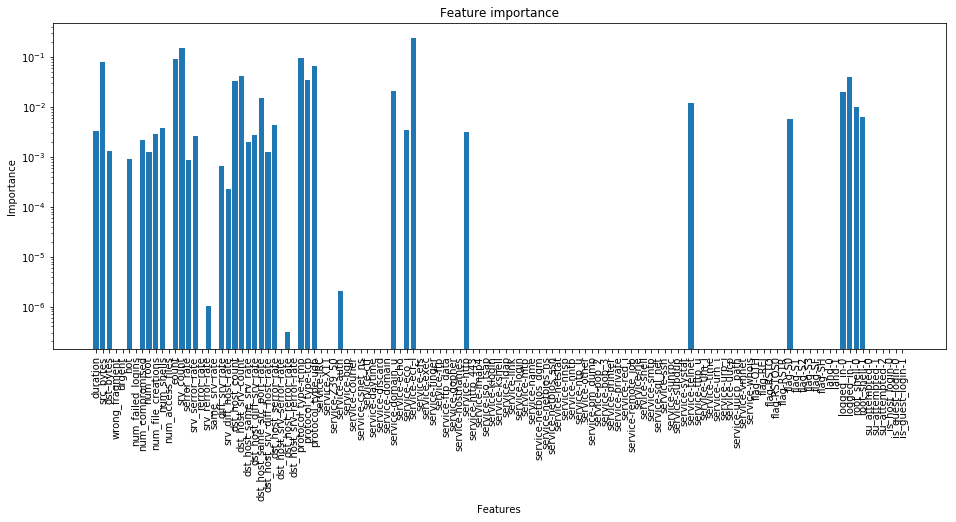

In [59]:
feature_importance = extraTreeClassifier.feature_importances_
plt.figure(figsize=(16, 6))
plt.yscale('log', nonposy='clip')
plt.bar(range(len(feature_importance)), feature_importance, align='center')
plt.xticks(range(len(feature_importance)), features_ad_df, rotation='vertical')
plt.title('Feature importance')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.show()

In [61]:
##Choose only relevant features

from sklearn.feature_selection import SelectFromModel
model = SelectFromModel(extraTreeClassifier, prefit=True)
X_new = model.transform(features_ad_df)
X_new.shape

(10000, 15)

In [79]:
X_new.shape

(10000, 15)

In [74]:
x_adf_train, x_adf_test, y_adf_train, y_adf_test = train_test_split(X_new, label_ad_df['outcome'] , test_size=0.2, random_state=42)

**Logistic Regression**

In [75]:
# Logistic regression
from sklearn.linear_model import LogisticRegression

Log_reg_model = LogisticRegression()

Log_reg_model.fit(x_adf_train, y_adf_train)

y_adf_pred_logistic = Log_reg_model.predict(x_adf_test)

In [76]:
# RMS value

score_adf_logistic = np.sqrt(mean_squared_error(y_adf_test, y_adf_pred_logistic))
print("Root Mean Squared Error: %.2f" % score_adf_logistic)
print('R2 score: %.2f' % r2_score(y_adf_test, y_adf_pred_logistic))

Root Mean Squared Error: 0.03
R2 score: 0.87


** KNN ** 

In [77]:
#implementing Nearest Neighbor

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=2)

knn.fit(x_adf_train, y_adf_train) 

y_adf_pred_knn = knn.predict(x_adf_test)

In [78]:
# Metrics
from sklearn import metrics

score_adf_knn_acc = metrics.accuracy_score(y_adf_test, y_adf_pred_knn)
print("Accuracy score: {}".format(score_adf_knn_acc))

score_adf_knn_precision = metrics.precision_score(y_adf_test, y_adf_pred_knn, average= "weighted")
print("Precision score: {}".format(score_ad_knn_precision))

score_adf_knn_recall = metrics.recall_score(y_adf_test, y_adf_pred_knn, average= "weighted")
print("Recall score: {}".format(score_ad_knn_recall))

score_adf_knn_f1 = metrics.f1_score(y_adf_test, y_adf_pred_knn, average= "weighted")
print("F1 score: {}".format(score_adf_knn_f1))

Accuracy score: 0.9995
Precision score: 0.9995002517623364
Recall score: 0.9995
F1 score: 0.999491442266779


** SVM ** 

In [81]:
# SVM
from sklearn.svm import SVC

svm_model = SVC(kernel="linear")

svm_model.fit(x_adf_train, y_adf_train)

y_adf_pred_svm = svm_model.predict(x_adf_test)

In [82]:
# Metrics

score_adf_svm_acc = metrics.accuracy_score(y_adf_test, y_adf_pred_svm)
print("Accuracy score: {}".format(score_adf_svm_acc))

score_adf_svm_precision = metrics.precision_score(y_ad_test, y_adf_pred_svm, average= "weighted")
print("Precision score: {}".format(score_adf_svm_precision))

score_adf_svm_recall = metrics.recall_score(y_adf_test, y_adf_pred_svm, average= "weighted")
print("Recall score: {}".format(score_ad_svm_recall))

score_adf_svm_f1 = metrics.f1_score(y_adf_test, y_adf_pred_svm, average= "weighted")
print("F1 score: {}".format(score_ad_svm_f1))

Accuracy score: 0.9995
Precision score: 0.9995002517623364
Recall score: 1.0
F1 score: 1.0


** Gaussian Naive Bayes **

In [83]:
#GNB
from sklearn.naive_bayes import GaussianNB
mnb_model = GaussianNB()

mnb_model.fit(x_adf_train, y_adf_train)

y_adf_pred_gnb = mnb_model.predict(x_adf_test)

In [84]:
# Metrics

score_adf_gnb_acc = metrics.accuracy_score(y_adf_test, y_adf_pred_gnb)
print("Accuracy score: {}".format(score_ad_gnb_acc))

score_adf_gnb_precision = metrics.precision_score(y_adf_test, y_adf_pred_gnb, average= "weighted")
print("Precision score: {}".format(score_ad_gnb_precision))

score_adf_gnb_recall = metrics.recall_score(y_adf_test, y_adf_pred_gnb, average= "weighted")
print("Recall score: {}".format(score_ad_gnb_recall))

score_adf_gnb_f1 = metrics.f1_score(y_adf_test, y_adf_pred_gnb, average= "weighted")
print("F1 score: {}".format(score_ad_gnb_f1))

Accuracy score: 0.997
Precision score: 0.9978571428571429
Recall score: 0.997
F1 score: 0.9972477295660948
